# EDA 

In [32]:
import os

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing
import tensorflow as tf
import tensorflow_probability as tfp

In [2]:
DATA_DIR = '/home/daitran/Desktop/git/soil_properties/data'

In [3]:
ntb_data_path = os.path.join(DATA_DIR, 'NTB_black_data.csv')

In [4]:
ntb_data= pd.read_csv(ntb_data_path)

### Data pre-processing

In [5]:
ntb_data

,Name,X,Y,Elevation,Soi properties (main)
0,NTB-1,549723.89,213802.88,28.5,reclaimed layer
1,NTB-1,549723.89,213802.88,26.0,sedimentary layer
2,NTB-1,549723.89,213802.88,21.5,weathered soil
3,NTB-1,549723.89,213802.88,7.7,weathered rock
4,NTB-1,549723.89,213802.88,-0.3,soft rock
...,...,...,...,...,...
91,NTB-12,549564.60,213804.70,14.5,weathered rock
92,NTB-12,549564.60,213804.70,7.5,moderate rock
93,NTB-12,549564.60,213804.70,-10.5,hard rock
94,NTB-12,549564.60,213804.70,-13.5,moderate rock


In [7]:
names = ntb_data['Soi properties (main)']

In [8]:
assign_num_list = {'topsoil layer': 0,
                      'weathered rock': 1,
                      'hard rock': 2,
                      'soft rock': 3,
                      'weathered soil': 4,
                      'colluvial layer': 5,
                      'moderate rock': 6,
                      'sedimentary layer': 7,
                      'reclaimed layer': 8}

In [9]:
target = names.replace(assign_num_list)

In [10]:
ntb_data['Target'] = target

In [11]:
ntb_data

,Name,X,Y,Elevation,Soi properties (main),Target
0,NTB-1,549723.89,213802.88,28.5,reclaimed layer,8
1,NTB-1,549723.89,213802.88,26.0,sedimentary layer,7
2,NTB-1,549723.89,213802.88,21.5,weathered soil,4
3,NTB-1,549723.89,213802.88,7.7,weathered rock,1
4,NTB-1,549723.89,213802.88,-0.3,soft rock,3
...,...,...,...,...,...,...
91,NTB-12,549564.60,213804.70,14.5,weathered rock,1
92,NTB-12,549564.60,213804.70,7.5,moderate rock,6
93,NTB-12,549564.60,213804.70,-10.5,hard rock,2
94,NTB-12,549564.60,213804.70,-13.5,moderate rock,6


In [33]:
X_train = ntb_data[['X','Y','Elevation']].to_numpy()
y_train = ntb_data['Target'].to_numpy()

In [66]:
# https://scikit-learn.org/stable/modules/preprocessing.html
# Minmax scaler
# Standart Scaler
# 

normalizer = preprocessing.MinMaxScaler()
normalized_train_X = normalizer.fit_transform(X_train)
# normalized_train_X

In [67]:
assign_num_list_change = {}
for k, v in assign_num_list.items():
    assign_num_list_change[v] = k

In [68]:
assign_num_list_change

{0: 'topsoil layer',
 1: 'weathered rock',
 2: 'hard rock',
 3: 'soft rock',
 4: 'weathered soil',
 5: 'colluvial layer',
 6: 'moderate rock',
 7: 'sedimentary layer',
 8: 'reclaimed layer'}

In [69]:
labels = assign_num_list_change
label_colours = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'brown', 'pink']

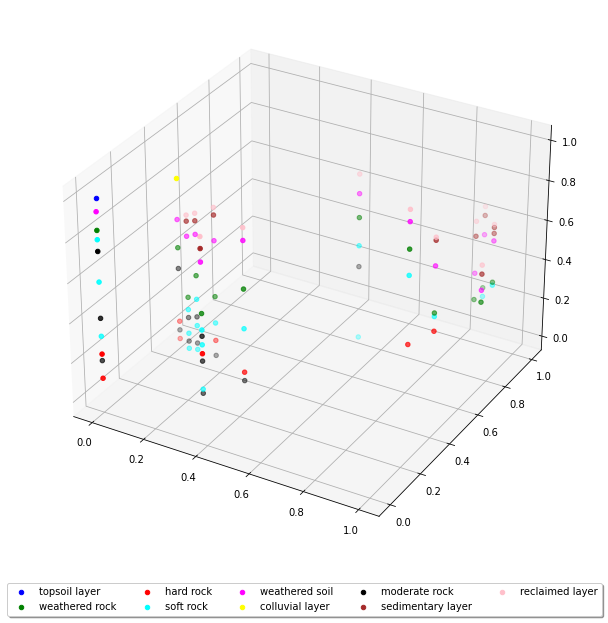

In [70]:
def plot_data(x, y, labels, colours):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    for c in np.unique(y):
        inx = np.where(y == c)
        ax.scatter(x[inx, 0], x[inx, 1], x[inx, 2], label=labels[c], c=colours[c])
        
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
    

plot_data(normalized_train_X, y_train, labels, label_colours)
plt.show()

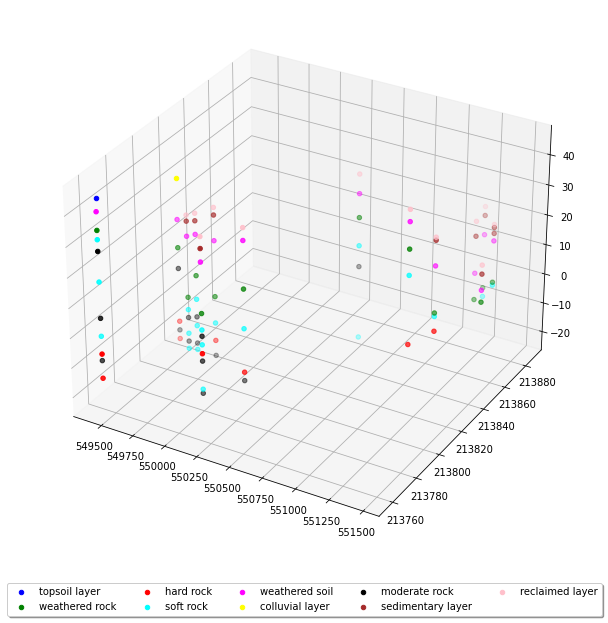

In [71]:
plot_data(X_train, y_train, labels, label_colours)
plt.show()